In [1]:
import pytest
import numpy as np
import glob
import json
import jwst
from jwst import datamodels
from astropy.io import fits, ascii
from jwst.associations.asn_from_list import asn_from_list
from jwst.associations.lib.rules_level2_base import DMSLevel2bBase
from jwst.associations.lib.rules_level3_base import DMS_Level3_Base
from jwst.pipeline import Detector1Pipeline, Spec2Pipeline, Spec3Pipeline, collect_pipeline_cfgs
from astropy.coordinates import Angle
from astropy.table import Table, vstack, unique
from astropy.stats import sigma_clip
from jwst.pipeline import calwebb_spec3
from jwst.associations.asn_from_list import asn_from_list
import matplotlib.pyplot as plt
import random
from jwst.associations.lib.rules_level3_base import DMS_Level3_Base
from jwst.outlier_detection import outlier_detection
from ci_watson.artifactory_helpers import get_bigdata

In [2]:
Slitfile1 = get_bigdata('jwst_validation_notebooks',
                                     'validation_data',
                                     'calwebb_spec2',
                                    'spec2_miri_test',
                                    'miri_lrs_slit_pt_nod1_v2.3.fits')
 
Slitfile2 = get_bigdata('jwst_validation_notebooks',
                                     'validation_data',
                                     'calwebb_spec2',
                                    'spec2_miri_test',
                                    'miri_lrs_slit_pt_nod2_v2.3.fits')

In [3]:
det_nod1 = Detector1Pipeline.call(Slitfile1, config_file='configfiles/calwebb_detector1.cfg', output_dir='mirisimv2.3sim_correctdither/detector1/')
det_nod2 = Detector1Pipeline.call(Slitfile2, config_file='configfiles/calwebb_detector1.cfg', output_dir='mirisimv2.3sim_correctdither/detector1/')

2021-07-27 16:07:47,665 - stpipe - INFO - PARS-DETECTOR1PIPELINE parameters found: /grp/crds/cache/references/jwst/jwst_miri_pars-detector1pipeline_0001.asdf
2021-07-27 16:07:47,743 - stpipe.Detector1Pipeline - INFO - Detector1Pipeline instance created.
2021-07-27 16:07:47,744 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleStep instance created.
2021-07-27 16:07:47,746 - stpipe.Detector1Pipeline.dq_init - INFO - DQInitStep instance created.
2021-07-27 16:07:47,747 - stpipe.Detector1Pipeline.saturation - INFO - SaturationStep instance created.
2021-07-27 16:07:47,749 - stpipe.Detector1Pipeline.ipc - INFO - IPCStep instance created.
2021-07-27 16:07:47,750 - stpipe.Detector1Pipeline.superbias - INFO - SuperBiasStep instance created.
2021-07-27 16:07:47,751 - stpipe.Detector1Pipeline.refpix - INFO - RefPixStep instance created.
2021-07-27 16:07:47,753 - stpipe.Detector1Pipeline.rscd - INFO - RscdStep instance created.
2021-07-27 16:07:47,754 - stpipe.Detector1Pipeline.firstfram

2021-07-27 16:07:48,200 - stpipe.Detector1Pipeline - INFO - Prefetch for READNOISE reference file is '/grp/crds/cache/references/jwst/jwst_miri_readnoise_0057.fits'.
2021-07-27 16:07:48,231 - stpipe.Detector1Pipeline - INFO - Prefetch for REFPIX reference file is 'N/A'.
2021-07-27 16:07:48,232 - stpipe.Detector1Pipeline - INFO - Prefetch for RESET reference file is '/grp/crds/cache/references/jwst/jwst_miri_reset_0047.fits'.
2021-07-27 16:07:48,265 - stpipe.Detector1Pipeline - INFO - Prefetch for RSCD reference file is '/grp/crds/cache/references/jwst/jwst_miri_rscd_0010.fits'.
2021-07-27 16:07:48,295 - stpipe.Detector1Pipeline - INFO - Prefetch for SATURATION reference file is '/grp/crds/cache/references/jwst/jwst_miri_saturation_0026.fits'.
2021-07-27 16:07:48,324 - stpipe.Detector1Pipeline - INFO - Prefetch for SUPERBIAS reference file is 'N/A'.
2021-07-27 16:07:48,324 - stpipe.Detector1Pipeline - INFO - Prefetch for TRAPDENSITY reference file is 'N/A'.
2021-07-27 16:07:48,325 - stp

2021-07-27 16:08:44,853 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /grp/crds/cache/references/jwst/jwst_miri_linearity_0024.fits
2021-07-27 16:08:54,340 - stpipe.Detector1Pipeline.linearity - INFO - Saved model in mirisimv2.3sim_correctdither/detector1/miri_lrs_slit_pt_nod1_v2.3_linearity.fits
2021-07-27 16:08:54,341 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2021-07-27 16:08:54,408 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(2, 10, 1024, 1032) from miri_lrs_slit_pt_nod1_v2.3_linearity.fits>,).
2021-07-27 16:08:54,409 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '/Users/kmurray/lrs_nOPS7-OTB-20191216_simulation', 'type': 'baselin

2021-07-27 16:09:06,711 - stpipe.Detector1Pipeline.ramp_fit - INFO - Using algorithm = ols
2021-07-27 16:09:06,712 - stpipe.Detector1Pipeline.ramp_fit - INFO - Using weighting = optimal
2021-07-27 16:09:06,727 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of leading groups that are flagged as DO_NOT_USE: 1
2021-07-27 16:09:06,728 - stpipe.Detector1Pipeline.ramp_fit - INFO - MIRI dataset has all pixels in the final group flagged as DO_NOT_USE.
2021-07-27 16:09:22,994 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 8
2021-07-27 16:09:22,995 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 2
2021-07-27 16:09:23,183 - stpipe.Detector1Pipeline.ramp_fit - INFO - Saved model in mirisimv2.3sim_correctdither/detector1/miri_lrs_slit_pt_nod1_v2.3_0_ramp_fit.fits
2021-07-27 16:09:23,346 - stpipe.Detector1Pipeline.ramp_fit - INFO - Saved model in mirisimv2.3sim_correctdither/detector1/miri_lrs_slit_pt_nod1_v2.3_1_ramp_fit.fits
2021-07-27 16:0

2021-07-27 16:09:24,325 - stpipe.Detector1Pipeline.superbias - INFO - SuperBiasStep instance created.
2021-07-27 16:09:24,327 - stpipe.Detector1Pipeline.refpix - INFO - RefPixStep instance created.
2021-07-27 16:09:24,328 - stpipe.Detector1Pipeline.rscd - INFO - RscdStep instance created.
2021-07-27 16:09:24,329 - stpipe.Detector1Pipeline.firstframe - INFO - FirstFrameStep instance created.
2021-07-27 16:09:24,331 - stpipe.Detector1Pipeline.lastframe - INFO - LastFrameStep instance created.
2021-07-27 16:09:24,332 - stpipe.Detector1Pipeline.linearity - INFO - LinearityStep instance created.
2021-07-27 16:09:24,333 - stpipe.Detector1Pipeline.dark_current - INFO - DarkCurrentStep instance created.
2021-07-27 16:09:24,334 - stpipe.Detector1Pipeline.reset - INFO - ResetStep instance created.
2021-07-27 16:09:24,336 - stpipe.Detector1Pipeline.persistence - INFO - PersistenceStep instance created.
2021-07-27 16:09:24,337 - stpipe.Detector1Pipeline.jump - INFO - JumpStep instance created.
202

2021-07-27 16:09:24,771 - stpipe.Detector1Pipeline - INFO - Prefetch for RESET reference file is '/grp/crds/cache/references/jwst/jwst_miri_reset_0047.fits'.
2021-07-27 16:09:24,803 - stpipe.Detector1Pipeline - INFO - Prefetch for RSCD reference file is '/grp/crds/cache/references/jwst/jwst_miri_rscd_0010.fits'.
2021-07-27 16:09:24,822 - stpipe.Detector1Pipeline - INFO - Prefetch for SATURATION reference file is '/grp/crds/cache/references/jwst/jwst_miri_saturation_0026.fits'.
2021-07-27 16:09:24,855 - stpipe.Detector1Pipeline - INFO - Prefetch for SUPERBIAS reference file is 'N/A'.
2021-07-27 16:09:24,856 - stpipe.Detector1Pipeline - INFO - Prefetch for TRAPDENSITY reference file is 'N/A'.
2021-07-27 16:09:24,858 - stpipe.Detector1Pipeline - INFO - Prefetch for TRAPPARS reference file is 'N/A'.
2021-07-27 16:09:24,859 - stpipe.Detector1Pipeline - INFO - Starting calwebb_detector1 ...
2021-07-27 16:09:25,031 - stpipe.Detector1Pipeline.group_scale - INFO - Step group_scale running with 

2021-07-27 16:10:36,117 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2021-07-27 16:10:36,192 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(2, 10, 1024, 1032) from miri_lrs_slit_pt_nod2_v2.3_linearity.fits>,).
2021-07-27 16:10:36,194 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '/Users/kmurray/lrs_nOPS7-OTB-20191216_simulation', 'type': 'baseline'}
2021-07-27 16:10:36,285 - stpipe.Detector1Pipeline.rscd - INFO - Using RSCD reference file /grp/crds/cache/references/jwst/jwst_miri_rscd_0010.fits
2021-07-27 16:10:36,980 - stpipe.Detector1Pipeline.rscd - INFO - Saved model in mirisimv2.3sim_correctdither/detector1/miri_lrs_slit_pt_nod2_v2.3_rscd.fits
2021-07-27 16:10:36,9

2021-07-27 16:10:48,177 - stpipe.Detector1Pipeline.ramp_fit - INFO - MIRI dataset has all pixels in the final group flagged as DO_NOT_USE.
2021-07-27 16:11:04,285 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 8
2021-07-27 16:11:04,286 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 2
2021-07-27 16:11:04,490 - stpipe.Detector1Pipeline.ramp_fit - INFO - Saved model in mirisimv2.3sim_correctdither/detector1/miri_lrs_slit_pt_nod2_v2.3_0_ramp_fit.fits
2021-07-27 16:11:04,647 - stpipe.Detector1Pipeline.ramp_fit - INFO - Saved model in mirisimv2.3sim_correctdither/detector1/miri_lrs_slit_pt_nod2_v2.3_1_ramp_fit.fits
2021-07-27 16:11:04,648 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2021-07-27 16:11:04,722 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<ImageModel(1024, 1032) from miri_lrs_slit_pt_nod2_v2.3_0_ramp_fit.fits>,).
2021-07-27 16:11:04,723 - stpipe.Detector1Pipeline.gain_sca

In [4]:
spec1 = Spec2Pipeline.call(det_nod1, save_results=True)
spec2 = Spec2Pipeline.call(det_nod2, save_results=True)

2021-07-27 16:11:05,428 - stpipe.Spec2Pipeline - INFO - Spec2Pipeline instance created.
2021-07-27 16:11:05,430 - stpipe.Spec2Pipeline.bkg_subtract - INFO - BackgroundStep instance created.
2021-07-27 16:11:05,433 - stpipe.Spec2Pipeline.assign_wcs - INFO - AssignWcsStep instance created.
2021-07-27 16:11:05,435 - stpipe.Spec2Pipeline.imprint_subtract - INFO - ImprintStep instance created.
2021-07-27 16:11:05,436 - stpipe.Spec2Pipeline.msa_flagging - INFO - MSAFlagOpenStep instance created.
2021-07-27 16:11:05,438 - stpipe.Spec2Pipeline.extract_2d - INFO - Extract2dStep instance created.
2021-07-27 16:11:05,442 - stpipe.Spec2Pipeline.master_background - INFO - MasterBackgroundNrsSlitsStep instance created.
2021-07-27 16:11:05,445 - stpipe.Spec2Pipeline.master_background.flat_field - INFO - FlatFieldStep instance created.
2021-07-27 16:11:05,446 - stpipe.Spec2Pipeline.master_background.pathloss - INFO - PathLossStep instance created.
2021-07-27 16:11:05,448 - stpipe.Spec2Pipeline.master_

2021-07-27 16:11:05,567 - stpipe.Spec2Pipeline - INFO - Prefetching reference files for dataset: 'miri_lrs_slit_pt_nod1_v2.3_gain_scale.fits' reftypes = ['apcorr', 'area', 'barshadow', 'camera', 'collimator', 'cubepar', 'dflat', 'disperser', 'distortion', 'drizpars', 'extract1d', 'fflat', 'filteroffset', 'flat', 'fore', 'fpa', 'fringe', 'ifufore', 'ifupost', 'ifuslicer', 'msa', 'msaoper', 'ote', 'pathloss', 'photom', 'regions', 'resol', 'sflat', 'specwcs', 'wavecorr', 'wavelengthrange', 'wfssbkg']
2021-07-27 16:11:05,688 - stpipe.Spec2Pipeline - INFO - Prefetch for APCORR reference file is '/grp/crds/cache/references/jwst/jwst_miri_apcorr_0007.fits'.
2021-07-27 16:11:05,720 - stpipe.Spec2Pipeline - INFO - Prefetch for AREA reference file is 'N/A'.
2021-07-27 16:11:05,722 - stpipe.Spec2Pipeline - INFO - Prefetch for BARSHADOW reference file is 'N/A'.
2021-07-27 16:11:05,723 - stpipe.Spec2Pipeline - INFO - Prefetch for CAMERA reference file is 'N/A'.
2021-07-27 16:11:05,723 - stpipe.Spec

2021-07-27 16:11:07,576 - stpipe.Spec2Pipeline.imprint_subtract - INFO - Step skipped.
2021-07-27 16:11:07,577 - stpipe.Spec2Pipeline.imprint_subtract - INFO - Step imprint_subtract done
2021-07-27 16:11:07,642 - stpipe.Spec2Pipeline.msa_flagging - INFO - Step msa_flagging running with args (<ImageModel(1024, 1032) from miri_lrs_slit_pt_nod1_v2.3_gain_scale.fits>,).
2021-07-27 16:11:07,644 - stpipe.Spec2Pipeline.msa_flagging - INFO - Step msa_flagging parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': True, 'suffix': None, 'search_output_file': True, 'input_dir': ''}
2021-07-27 16:11:07,646 - stpipe.Spec2Pipeline.msa_flagging - INFO - Step skipped.
2021-07-27 16:11:07,648 - stpipe.Spec2Pipeline.msa_flagging - INFO - Step msa_flagging done
2021-07-27 16:11:07,708 - stpipe.Spec2Pipeline.srctype - INFO - Step srctype running with args (<Image

2021-07-27 16:11:11,069 - stpipe.Spec2Pipeline.resample_spec - INFO - Drizpars reference file: /grp/crds/cache/references/jwst/jwst_miri_drizpars_0001.fits
2021-07-27 16:11:11,310 - stpipe.Spec2Pipeline.resample_spec - INFO - Resampling science data
2021-07-27 16:11:11,798 - stpipe.Spec2Pipeline.resample_spec - INFO - Drizzling (1024, 1032) --> (387, 44)
2021-07-27 16:11:11,807 - stpipe.Spec2Pipeline.resample_spec - INFO - Resampling var_rnoise
2021-07-27 16:11:12,286 - stpipe.Spec2Pipeline.resample_spec - INFO - Drizzling (1024, 1032) --> (387, 44)
2021-07-27 16:11:12,295 - stpipe.Spec2Pipeline.resample_spec - INFO - Resampling var_poisson
2021-07-27 16:11:12,781 - stpipe.Spec2Pipeline.resample_spec - INFO - Drizzling (1024, 1032) --> (387, 44)
2021-07-27 16:11:12,790 - stpipe.Spec2Pipeline.resample_spec - INFO - Resampling var_flat
2021-07-27 16:11:13,276 - stpipe.Spec2Pipeline.resample_spec - INFO - Drizzling (1024, 1032) --> (387, 44)
2021-07-27 16:11:13,298 - stpipe.Spec2Pipeline.

2021-07-27 16:11:14,709 - stpipe.Spec2Pipeline - INFO - Prefetching reference files for dataset: 'miri_lrs_slit_pt_nod2_v2.3_gain_scale.fits' reftypes = ['apcorr', 'area', 'barshadow', 'camera', 'collimator', 'cubepar', 'dflat', 'disperser', 'distortion', 'drizpars', 'extract1d', 'fflat', 'filteroffset', 'flat', 'fore', 'fpa', 'fringe', 'ifufore', 'ifupost', 'ifuslicer', 'msa', 'msaoper', 'ote', 'pathloss', 'photom', 'regions', 'resol', 'sflat', 'specwcs', 'wavecorr', 'wavelengthrange', 'wfssbkg']
2021-07-27 16:11:14,745 - stpipe.Spec2Pipeline - INFO - Prefetch for APCORR reference file is '/grp/crds/cache/references/jwst/jwst_miri_apcorr_0007.fits'.
2021-07-27 16:11:14,760 - stpipe.Spec2Pipeline - INFO - Prefetch for AREA reference file is 'N/A'.
2021-07-27 16:11:14,761 - stpipe.Spec2Pipeline - INFO - Prefetch for BARSHADOW reference file is 'N/A'.
2021-07-27 16:11:14,761 - stpipe.Spec2Pipeline - INFO - Prefetch for CAMERA reference file is 'N/A'.
2021-07-27 16:11:14,762 - stpipe.Spec

2021-07-27 16:11:16,358 - stpipe.Spec2Pipeline.imprint_subtract - INFO - Step skipped.
2021-07-27 16:11:16,360 - stpipe.Spec2Pipeline.imprint_subtract - INFO - Step imprint_subtract done
2021-07-27 16:11:16,423 - stpipe.Spec2Pipeline.msa_flagging - INFO - Step msa_flagging running with args (<ImageModel(1024, 1032) from miri_lrs_slit_pt_nod2_v2.3_gain_scale.fits>,).
2021-07-27 16:11:16,425 - stpipe.Spec2Pipeline.msa_flagging - INFO - Step msa_flagging parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': True, 'suffix': None, 'search_output_file': True, 'input_dir': ''}
2021-07-27 16:11:16,426 - stpipe.Spec2Pipeline.msa_flagging - INFO - Step skipped.
2021-07-27 16:11:16,427 - stpipe.Spec2Pipeline.msa_flagging - INFO - Step msa_flagging done
2021-07-27 16:11:16,487 - stpipe.Spec2Pipeline.srctype - INFO - Step srctype running with args (<Image

2021-07-27 16:11:17,707 - stpipe.Spec2Pipeline.resample_spec - INFO - Drizpars reference file: /grp/crds/cache/references/jwst/jwst_miri_drizpars_0001.fits
2021-07-27 16:11:17,918 - stpipe.Spec2Pipeline.resample_spec - INFO - Resampling science data
2021-07-27 16:11:18,417 - stpipe.Spec2Pipeline.resample_spec - INFO - Drizzling (1024, 1032) --> (387, 44)
2021-07-27 16:11:18,430 - stpipe.Spec2Pipeline.resample_spec - INFO - Resampling var_rnoise
2021-07-27 16:11:18,927 - stpipe.Spec2Pipeline.resample_spec - INFO - Drizzling (1024, 1032) --> (387, 44)
2021-07-27 16:11:18,939 - stpipe.Spec2Pipeline.resample_spec - INFO - Resampling var_poisson
2021-07-27 16:11:19,428 - stpipe.Spec2Pipeline.resample_spec - INFO - Drizzling (1024, 1032) --> (387, 44)
2021-07-27 16:11:19,437 - stpipe.Spec2Pipeline.resample_spec - INFO - Resampling var_flat
2021-07-27 16:11:19,932 - stpipe.Spec2Pipeline.resample_spec - INFO - Drizzling (1024, 1032) --> (387, 44)
2021-07-27 16:11:19,956 - stpipe.Spec2Pipeline.

In [32]:
cal_files = glob.glob('*_cal.fits')
print(cal_files)

spec1file = datamodels.open(spec1)
#asn3 = asn_from_list(cal_files, rule=DMS_Level3_Base,product_name='combine_dithers_exposures')

['miri_lrs_slit_pt_nod2_v2_cal.fits', 'miri_lrs_slit_pt_nod1_v2_cal.fits']


In [33]:
#with open('sp3-lrs-slit-test_asn.json', 'w') as fp:
    #fp.write(asn3.dump()[1])
    
spec2_file1 = datamodels.open(cal_files[0])
spec2_file2 = datamodels.open(cal_files[1])
print(spec2_file1.data)

<array (unloaded) shape: [1024, 1032] dtype: >f4>


In [34]:
print(spec2_file1.meta.wcs.bounding_box[0][1]), spec2_file1.meta.wcs.bounding_box[0][0], spec2_file1.meta.wcs.bounding_box[1][1], spec2_file1.meta.wcs.bounding_box[1][0]
bbox_w = spec2_file1.meta.wcs.bounding_box[0][1] - spec2_file1.meta.wcs.bounding_box[0][0]
bbox_ht = spec2_file1.meta.wcs.bounding_box[1][1] - spec2_file1.meta.wcs.bounding_box[1][0]
left = int(spec2_file1.meta.wcs.bounding_box[0][0])
right = int(spec2_file1.meta.wcs.bounding_box[0][1])
down = int(spec2_file1.meta.wcs.bounding_box[1][0])
up = int(spec2_file1.meta.wcs.bounding_box[1][1])
print('Model bbox (nod 1)= {0} '.format(spec2_file1.meta.wcs.bounding_box))
print('Model: Height x width of bounding box (nod 1) = {0} x {1} pixels'.format(bbox_ht, bbox_w))
print(left, right, down, up)

346.5
Model bbox (nod 1)= ((302.5, 346.5), (6.5, 396.5)) 
Model: Height x width of bounding box (nod 1) = 390.0 x 44.0 pixels
302 346 6 396


In [35]:
pixloc = []
pixlocorder = []
pixloc2 = []
pixlocorder2 = []
for i in range(len(cal_files)):
    pixloc.append([random.randint(left,right),random.randint(down,up)])
    pixloc.append([random.randint(left,right),random.randint(down,up)])
    pixloc2.append([random.randint(left,right),random.randint(down,up)])
    pixloc2.append([random.randint(left,right),random.randint(down,up)])
    
pixlocorder = np.array(pixloc)
pixlocorder2 = np.array(pixloc2)
print(pixloc[0])

[339, 133]


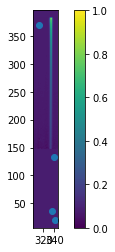

20872.355


In [36]:
#print(spec2_file1.data[0,pixloc[3]])
plt.imshow(spec2_file1.data)
plt.xlim(left,right)
plt.ylim(down,up)
x,y = pixlocorder.T
plt.scatter(x,y)
plt.colorbar()
plt.show()
print(spec2_file1.data[382, 334])

In [37]:
maxindex = spec2_file1.data.argmax()
print(maxindex)
np.unravel_index(spec2_file1.data.argmax(), spec2_file1.data.shape)

outliervalue = maxindex #* 10

394558


In [38]:
print(spec2_file1.data[pixloc[3][0],pixloc[3][1]])
spec2_file1.data[pixloc[0][0],pixloc[0][1]] = outliervalue
spec2_file1.data[pixloc[1][0],pixloc[1][1]] = outliervalue
spec2_file1.data[pixloc[2][0],pixloc[2][1]] = outliervalue
spec2_file1.data[pixloc[3][0],pixloc[3][1]] = outliervalue
print(spec2_file1.data[pixloc[3][0],pixloc[3][1]])
print(spec2_file1.data[382, 334])
spec2_file1.save('./spec2_file1_outlier.fits')

-0.0
394558.0
20872.355


'./spec2_file1_outlier.fits'

<ImageModel(1024, 1032) from spec2_file1_outlier.fits>
394558.0
20872.355


2021-07-27 16:24:25,450 - stpipe - WARNING - /var/folders/dz/41vqfd050yq8b664hsvm9hjr0001tk/T/ipykernel_45877/3912821350.py:5: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(sanitycheck.data))

2021-07-27 16:24:25,451 - stpipe - WARNING - /var/folders/dz/41vqfd050yq8b664hsvm9hjr0001tk/T/ipykernel_45877/3912821350.py:5: RuntimeWarning: invalid value encountered in log
  plt.imshow(np.log(sanitycheck.data))



(6.0, 396.0)

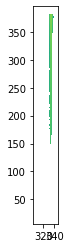

In [52]:
sanitycheck = datamodels.open('./spec2_file1_outlier.fits')
print(sanitycheck)
print(sanitycheck.data[pixloc[3][0],pixloc[3][1]])
print(sanitycheck.data[382, 334])
plt.imshow(np.log(sanitycheck.data))
plt.xlim(left,right)
plt.ylim(down,up)
#plt.xlim(x[0]-5, x[0]+5)
#plt.ylim(y[0]-5, y[0]+5)

(128.0, 138.0)

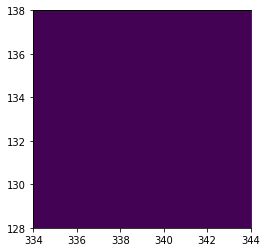

In [40]:
plt.imshow(sanitycheck.data)
plt.xlim(x[0]-5, x[0]+5)
plt.ylim(y[0]-5, y[0]+5)

2021-07-27 16:26:29,194 - stpipe - WARNING - /var/folders/dz/41vqfd050yq8b664hsvm9hjr0001tk/T/ipykernel_45877/2650398253.py:1: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(sanitycheck.dq))



18842820.623752803

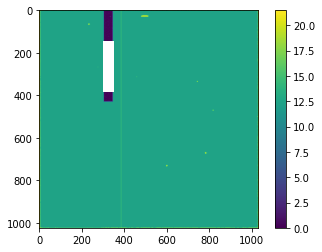

In [56]:
plt.imshow(np.log(sanitycheck.dq))
plt.colorbar()
np.mean(sanitycheck.dq)

In [41]:
print(spec2_file2.data[pixloc[3][0],pixloc[3][1]])
spec2_file2.data[pixloc2[0][0],pixloc2[0][1]] = outliervalue
spec2_file2.data[pixloc2[1][0],pixloc2[1][1]] = outliervalue
spec2_file2.data[pixloc2[2][0],pixloc2[2][1]] = outliervalue
spec2_file2.data[pixloc2[3][0],pixloc2[3][1]] = outliervalue
print(spec2_file2.data[pixloc2[3][0],pixloc2[3][1]])
print(spec2_file2.data[382, 334])
spec2_file2.save('./spec2_file2_outlier.fits')

-0.0
394558.0
-12.235362


'./spec2_file2_outlier.fits'

In [42]:
asn3_files = glob.glob('*_outlier.fits')
print(asn3_files)
asn3 = asn_from_list(asn3_files, rule=DMS_Level3_Base,product_name='combine_dithers_exposures')
with open('lrs-slit-spec3.json', 'w') as fp:
    fp.write(asn3.dump()[1])

['spec2_file2_outlier.fits', 'spec2_file1_outlier.fits']


In [43]:
Spec3Pipeline.call('lrs-slit-spec3.json', save_results=True)

2021-07-27 16:21:53,260 - stpipe.Spec3Pipeline - INFO - Spec3Pipeline instance created.
2021-07-27 16:21:53,261 - stpipe.Spec3Pipeline.assign_mtwcs - INFO - AssignMTWcsStep instance created.
2021-07-27 16:21:53,264 - stpipe.Spec3Pipeline.master_background - INFO - MasterBackgroundStep instance created.
2021-07-27 16:21:53,266 - stpipe.Spec3Pipeline.mrs_imatch - INFO - MRSIMatchStep instance created.
2021-07-27 16:21:53,268 - stpipe.Spec3Pipeline.outlier_detection - INFO - OutlierDetectionStep instance created.
2021-07-27 16:21:53,270 - stpipe.Spec3Pipeline.resample_spec - INFO - ResampleSpecStep instance created.
2021-07-27 16:21:53,272 - stpipe.Spec3Pipeline.cube_build - INFO - CubeBuildStep instance created.
2021-07-27 16:21:53,274 - stpipe.Spec3Pipeline.extract_1d - INFO - Extract1dStep instance created.
2021-07-27 16:21:53,276 - stpipe.Spec3Pipeline.combine_1d - INFO - Combine1dStep instance created.
2021-07-27 16:21:53,372 - stpipe.Spec3Pipeline - INFO - Step Spec3Pipeline running

2021-07-27 16:21:57,859 - stpipe.Spec3Pipeline.resample_spec - INFO - Drizpars reference file: /grp/crds/cache/references/jwst/jwst_miri_drizpars_0001.fits
2021-07-27 16:21:58,150 - stpipe.Spec3Pipeline.resample_spec - INFO - Blending metadata for combine_dithers_exposures
2021-07-27 16:21:58,662 - stpipe.Spec3Pipeline.resample_spec - INFO - Resampling science data
2021-07-27 16:21:59,149 - stpipe.Spec3Pipeline.resample_spec - INFO - Drizzling (1024, 1032) --> (387, 62)
2021-07-27 16:21:59,663 - stpipe.Spec3Pipeline.resample_spec - INFO - Drizzling (1024, 1032) --> (387, 62)
2021-07-27 16:21:59,674 - stpipe.Spec3Pipeline.resample_spec - INFO - Resampling var_rnoise
2021-07-27 16:22:00,184 - stpipe.Spec3Pipeline.resample_spec - INFO - Drizzling (1024, 1032) --> (387, 62)
2021-07-27 16:22:00,710 - stpipe.Spec3Pipeline.resample_spec - INFO - Drizzling (1024, 1032) --> (387, 62)
2021-07-27 16:22:00,721 - stpipe.Spec3Pipeline.resample_spec - INFO - Resampling var_poisson
2021-07-27 16:22:01

In [44]:
outlier_detect_file = datamodels.open('combine_dithers_exposures_s2d.fits')

2021-07-27 16:24:13,044 - stpipe - WARNING - /var/folders/dz/41vqfd050yq8b664hsvm9hjr0001tk/T/ipykernel_45877/259286325.py:1: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(outlier_detect_file.data))

2021-07-27 16:24:13,045 - stpipe - WARNING - /var/folders/dz/41vqfd050yq8b664hsvm9hjr0001tk/T/ipykernel_45877/259286325.py:1: RuntimeWarning: invalid value encountered in log
  plt.imshow(np.log(outlier_detect_file.data))



189212.33


(387, 62)

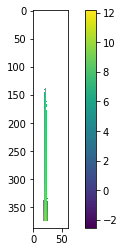

In [51]:
plt.imshow(np.log(outlier_detect_file.data))
plt.colorbar()
print(np.max(outlier_detect_file.data))
np.shape(outlier_detect_file.data)

0.0

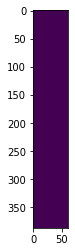

In [58]:
plt.imshow(outlier_detect_file.dq)
np.mean(outlier_detect_file.dq)

In [47]:
cal_files = glob.glob('*_cal.fits')
print(cal_files)
asn = asn_from_list(cal_files, rule=DMS_Level3_Base,product_name='combine_dithers_exposures')
with open('check-spec3.json', 'w') as fp:
    fp.write(asn.dump()[1])

['miri_lrs_slit_pt_nod2_v2_cal.fits', 'miri_lrs_slit_pt_nod1_v2_cal.fits']


In [48]:
Spec3Pipeline.call('check-spec3.json', save_results=True)

2021-07-27 16:22:05,780 - stpipe.Spec3Pipeline - INFO - Spec3Pipeline instance created.
2021-07-27 16:22:05,782 - stpipe.Spec3Pipeline.assign_mtwcs - INFO - AssignMTWcsStep instance created.
2021-07-27 16:22:05,784 - stpipe.Spec3Pipeline.master_background - INFO - MasterBackgroundStep instance created.
2021-07-27 16:22:05,786 - stpipe.Spec3Pipeline.mrs_imatch - INFO - MRSIMatchStep instance created.
2021-07-27 16:22:05,788 - stpipe.Spec3Pipeline.outlier_detection - INFO - OutlierDetectionStep instance created.
2021-07-27 16:22:05,790 - stpipe.Spec3Pipeline.resample_spec - INFO - ResampleSpecStep instance created.
2021-07-27 16:22:05,792 - stpipe.Spec3Pipeline.cube_build - INFO - CubeBuildStep instance created.
2021-07-27 16:22:05,794 - stpipe.Spec3Pipeline.extract_1d - INFO - Extract1dStep instance created.
2021-07-27 16:22:05,796 - stpipe.Spec3Pipeline.combine_1d - INFO - Combine1dStep instance created.
2021-07-27 16:22:05,869 - stpipe.Spec3Pipeline - INFO - Step Spec3Pipeline running

2021-07-27 16:22:09,943 - stpipe.Spec3Pipeline.resample_spec - INFO - Drizpars reference file: /grp/crds/cache/references/jwst/jwst_miri_drizpars_0001.fits
2021-07-27 16:22:10,253 - stpipe.Spec3Pipeline.resample_spec - INFO - Blending metadata for combine_dithers_exposures
2021-07-27 16:22:10,828 - stpipe.Spec3Pipeline.resample_spec - INFO - Resampling science data
2021-07-27 16:22:11,327 - stpipe.Spec3Pipeline.resample_spec - INFO - Drizzling (1024, 1032) --> (387, 62)
2021-07-27 16:22:11,832 - stpipe.Spec3Pipeline.resample_spec - INFO - Drizzling (1024, 1032) --> (387, 62)
2021-07-27 16:22:11,841 - stpipe.Spec3Pipeline.resample_spec - INFO - Resampling var_rnoise
2021-07-27 16:22:12,337 - stpipe.Spec3Pipeline.resample_spec - INFO - Drizzling (1024, 1032) --> (387, 62)
2021-07-27 16:22:12,848 - stpipe.Spec3Pipeline.resample_spec - INFO - Drizzling (1024, 1032) --> (387, 62)
2021-07-27 16:22:12,859 - stpipe.Spec3Pipeline.resample_spec - INFO - Resampling var_poisson
2021-07-27 16:22:13

In [49]:
checking_file = datamodels.open('combine_dithers_exposures_s2d.fits')

19106.537

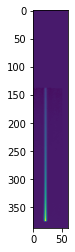

In [50]:
plt.imshow(checking_file.data)
np.shape(checking_file.data)
np.max(checking_file.data)

0.0

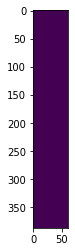

In [60]:
plt.imshow(checking_file.dq)
np.mean(checking_file.dq)